# Steinberg-Style Analysis

This notebook will be used to replicate some of the methods and plots from [[Steinberg 2022]] using argo data. To see a list of applicable tasks and other useful notes, see: https://github.com/ocean-transport/argo-intern/issues/10#issuecomment-1574128413 

In [1]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
from importlib import reload
from cmocean import cm as cmo
import xrft
import pandas as pd


import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import MLD_funcs as mf

In [179]:
reload(df)
reload(ef)
reload(ff)
reload(pf)
reload(mf)

<module 'MLD_funcs' from '/home.ufs/amf2288/argo-intern/MLD_funcs.py'>

In [3]:
'''
box_z = xr.open_dataset('202206_boxes/lon:(25,45)_lat:(-60,-50)_ds_z.nc')
box_r = xr.open_dataset('202206_boxes/lon:(25,45)_lat:(-60,-50)_ds_rho.nc')
'''

"\nbox_z = xr.open_dataset('202206_boxes/lon:(25,45)_lat:(-60,-50)_ds_z.nc')\nbox_r = xr.open_dataset('202206_boxes/lon:(25,45)_lat:(-60,-50)_ds_rho.nc')\n"

In [156]:
box_z = xr.open_dataset('202206_boxes/lon:(25,30)_lat:(-60,-55)_ds_z.nc')
box_r = xr.open_dataset('202206_boxes/lon:(25,30)_lat:(-60,-55)_ds_rho.nc')

In [5]:
float_z = xr.open_dataset('202206_floats/float_ID:(1901700)_ds_z.nc')
float_rho = xr.open_dataset('202206_floats/float_ID:(1901700)_ds_rho.nc')

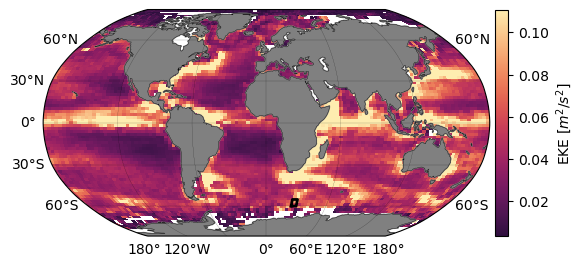

In [157]:
pf.plot_box([[25,30,-60,-55]])

In [158]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

## Figure 3

I'd like to make this plot (or at least parts a/b and e/f) because I think it's visually useful to frame what density surfaces look like in a given region, however I haven't solved the profile identification issue from the methods notebook, so I think it's best to put this plot on hold for now. If the MLD .nc file is more of a pain than it's worth, I can also calculate MLD using threshold values at least.

Ultimately, this is probably a rabbit hole that might not be that important to chase down right now. Move forward with something you know you can do.

In [183]:
box_z = mf.add_times(box_z)
box_z = mf.get_MLD(box_z)

In [160]:
SIG0_01 = box_t.SIG0.where(box_t.month<2).dropna('N_PROF')
SIG0_02 = box_t.SIG0.where(box_t.month<3).where(box_t.month>1).dropna('N_PROF')
SIG0_03 = box_t.SIG0.where(box_t.month<4).where(box_t.month>2).dropna('N_PROF')
SIG0_04 = box_t.SIG0.where(box_t.month<5).where(box_t.month>3).dropna('N_PROF')
SIG0_05 = box_t.SIG0.where(box_t.month<6).where(box_t.month>4).dropna('N_PROF')
SIG0_06 = box_t.SIG0.where(box_t.month<7).where(box_t.month>5).dropna('N_PROF')
SIG0_07 = box_t.SIG0.where(box_t.month<8).where(box_t.month>6).dropna('N_PROF')
SIG0_08 = box_t.SIG0.where(box_t.month<9).where(box_t.month>7).dropna('N_PROF')
SIG0_09 = box_t.SIG0.where(box_t.month<10).where(box_t.month>8).dropna('N_PROF')
SIG0_10 = box_t.SIG0.where(box_t.month<11).where(box_t.month>9).dropna('N_PROF')
SIG0_11 = box_t.SIG0.where(box_t.month<12).where(box_t.month>10).dropna('N_PROF')
SIG0_12 = box_t.SIG0.where(box_t.month<13).where(box_t.month>11).dropna('N_PROF')

SIG0_s = [SIG0_01,SIG0_02,SIG0_03,SIG0_04,SIG0_05,SIG0_06,SIG0_07,SIG0_08,SIG0_09,SIG0_10,SIG0_11,SIG0_12]

In [161]:
SPICE_01 = box_t.SPICE.where(box_t.month<2).dropna('N_PROF')
SPICE_02 = box_t.SPICE.where(box_t.month<3).where(box_t.month>1).dropna('N_PROF')
SPICE_03 = box_t.SPICE.where(box_t.month<4).where(box_t.month>2).dropna('N_PROF')
SPICE_04 = box_t.SPICE.where(box_t.month<5).where(box_t.month>3).dropna('N_PROF')
SPICE_05 = box_t.SPICE.where(box_t.month<6).where(box_t.month>4).dropna('N_PROF')
SPICE_06 = box_t.SPICE.where(box_t.month<7).where(box_t.month>5).dropna('N_PROF')
SPICE_07 = box_t.SPICE.where(box_t.month<8).where(box_t.month>6).dropna('N_PROF')
SPICE_08 = box_t.SPICE.where(box_t.month<9).where(box_t.month>7).dropna('N_PROF')
SPICE_09 = box_t.SPICE.where(box_t.month<10).where(box_t.month>8).dropna('N_PROF')
SPICE_10 = box_t.SPICE.where(box_t.month<11).where(box_t.month>9).dropna('N_PROF')
SPICE_11 = box_t.SPICE.where(box_t.month<12).where(box_t.month>10).dropna('N_PROF')
SPICE_12 = box_t.SPICE.where(box_t.month<13).where(box_t.month>11).dropna('N_PROF')

SPICE_s = [SPICE_01,SPICE_02,SPICE_03,SPICE_04,SPICE_05,SPICE_06,SPICE_07,SPICE_08,SPICE_09,SPICE_10,SPICE_11,SPICE_12]

Text(0.5, 1.0, 'Entire Spice Profiles')

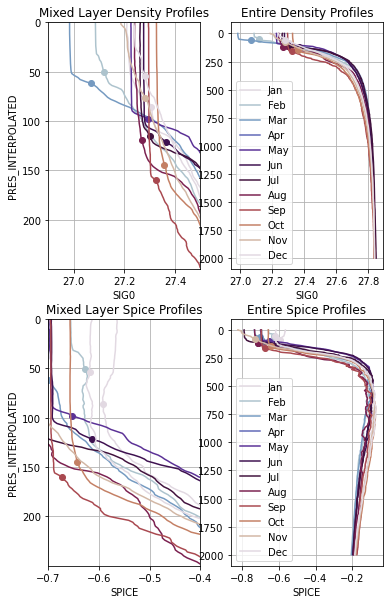

In [162]:
plt.figure(figsize=(6,10))
colors = plt.cm.twilight(np.linspace(0,1,12))

plt.subplot(2,2,1)
for n in range(0,len(SIG0_s)):
    SIG0_mean = SIG0_s[n].mean('N_PROF')
    SIG0_mean.plot(y='PRES_INTERPOLATED',label='{}'.format(months[n]),color=colors[n])
    plt.plot(SIG0_mean.sel(PRES_INTERPOLATED=SIG0_s[n].MLD.mean('N_PROF'),method='nearest'), SIG0_s[n].MLD.mean('N_PROF'),marker='o',color=colors[n])
plt.ylim(0,250)
plt.xlim(26.9,27.5)
plt.yticks(range(0,250,50),range(0,250,50))
plt.grid()
plt.gca().invert_yaxis()
#plt.legend()
plt.title('Mixed Layer Density Profiles')

plt.subplot(2,2,2)
for n in range(0,len(SIG0_s)):
    SIG0_mean = SIG0_s[n].mean('N_PROF')
    SIG0_mean.plot(y='PRES_INTERPOLATED',label='{}'.format(months[n]),color=colors[n])
    plt.plot(SIG0_mean.sel(PRES_INTERPOLATED=SIG0_s[n].MLD.mean('N_PROF'),method='nearest'), SIG0_s[n].MLD.mean('N_PROF'),marker='o',color=colors[n])
plt.ylabel('')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.grid()
plt.gca().invert_yaxis()
plt.legend()
plt.title('Entire Density Profiles')

plt.subplot(2,2,3)
for n in range(0,len(SIG0_s)):
    SPICE_mean = SPICE_s[n].mean('N_PROF')
    SPICE_mean.plot(y='PRES_INTERPOLATED',label='{}'.format(months[n]),color=colors[n])
    plt.plot(SPICE_mean.sel(PRES_INTERPOLATED=SPICE_s[n].MLD.mean('N_PROF'),method='nearest'), SPICE_s[n].MLD.mean('N_PROF'),marker='o',color=colors[n])
plt.ylim(0,250)
plt.xlim(-0.7,-0.4)
plt.yticks(range(0,250,50),range(0,250,50))
plt.grid()
plt.gca().invert_yaxis()
#plt.legend()
plt.title('Mixed Layer Spice Profiles')

plt.subplot(2,2,4)
for n in range(0,len(SIG0_s)):
    SPICE_mean = SPICE_s[n].mean('N_PROF')
    SPICE_mean.plot(y='PRES_INTERPOLATED',label='{}'.format(months[n]),color=colors[n])
    plt.plot(SPICE_mean.sel(PRES_INTERPOLATED=SPICE_s[n].MLD.mean('N_PROF'),method='nearest'), SPICE_s[n].MLD.mean('N_PROF'),marker='o',color=colors[n])
plt.ylabel('')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.grid()
plt.gca().invert_yaxis()
plt.legend()
plt.title('Entire Spice Profiles')

## Figure 5

This plot shows variance at different locations, filter scales, and seasons and we would additionally need it to displace these metrics across depths. That's a lot of information floating out there. I think it makes sense to only focus on one region and figure out how to show variance at different scales, seasons, and depths at that specific location. Then expand the geography when you're more comfortable

In [163]:
l1 = 100
l2 = 200
l3 = 400

In [184]:
mke1_d = ef.get_MV(box_z,l1,variable='SIG0')
mke2_d = ef.get_MV(box_z,l2,variable='SIG0')
mke3_d = ef.get_MV(box_z,l3,variable='SIG0')

eke1_d = ef.get_EV(box_z,l1,variable='SIG0')
eke2_d = ef.get_EV(box_z,l2,variable='SIG0')
eke3_d = ef.get_EV(box_z,l3,variable='SIG0')

mke1_s = ef.get_MV(box_z,l1,variable='SPICE')
mke2_s = ef.get_MV(box_z,l2,variable='SPICE')
mke3_s = ef.get_MV(box_z,l3,variable='SPICE')

eke1_s = ef.get_EV(box_z,l1,variable='SPICE')
eke2_s = ef.get_EV(box_z,l2,variable='SPICE')
eke3_s = ef.get_EV(box_z,l3,variable='SPICE')

In [191]:
MKE0_d = eke1_d
MKE1_d = mke1_d - mke2_d
MKE2_d = mke2_d - mke3_d
MKE3_d = mke3_d

EKE0_d = eke1_d
EKE1_d = eke2_d - eke1_d
EKE2_d = eke3_d - eke2_d
EKE3_d = mke3_d

MKE0_s = eke1_s
MKE1_s = mke1_s - mke2_s
MKE2_s = mke2_s - mke3_s
MKE3_s = mke3_s

EKE0_s = eke1_s
EKE1_s = eke2_s - eke1_s
EKE2_s = eke3_s - eke2_s
EKE3_s = mke3_s

Need a function that adds a month coordinate to xarray, it's annoying to have to type ".TIME.dt.month" every time. 

Now that I've made the one below, I'm considering I don't want an integer value of 0-12 because I need a smooth curve that runs from January to December. Instead, I need something that is fractional month (to progressively move along the x axis) and this should reorder the DataArray so the sequence is strictly increasing.

In [192]:
MKE0_dm = MKE0_d.sortby('month_frac').sum('PRES_INTERPOLATED')
MKE1_dm = MKE1_d.sortby('month_frac').sum('PRES_INTERPOLATED')
MKE2_dm = MKE2_d.sortby('month_frac').sum('PRES_INTERPOLATED')
MKE3_dm = MKE3_d.sortby('month_frac').sum('PRES_INTERPOLATED')

MKE0_sm = MKE0_s.sortby('month_frac').sum('PRES_INTERPOLATED')
MKE1_sm = MKE1_s.sortby('month_frac').sum('PRES_INTERPOLATED')
MKE2_sm = MKE2_s.sortby('month_frac').sum('PRES_INTERPOLATED')
MKE3_sm = MKE3_s.sortby('month_frac').sum('PRES_INTERPOLATED')

EKE0_dm = EKE0_d.sortby('month_frac').sum('PRES_INTERPOLATED')
EKE1_dm = EKE1_d.sortby('month_frac').sum('PRES_INTERPOLATED')
EKE2_dm = EKE2_d.sortby('month_frac').sum('PRES_INTERPOLATED')
EKE3_dm = EKE3_d.sortby('month_frac').sum('PRES_INTERPOLATED')

EKE0_sm = EKE0_s.sortby('month_frac').sum('PRES_INTERPOLATED')
EKE1_sm = EKE1_s.sortby('month_frac').sum('PRES_INTERPOLATED')
EKE2_sm = EKE2_s.sortby('month_frac').sum('PRES_INTERPOLATED')
EKE3_sm = EKE3_s.sortby('month_frac').sum('PRES_INTERPOLATED')

In [193]:
MKE0_dy = MKE0_d.sortby('year_frac').sum('PRES_INTERPOLATED')
MKE1_dy = MKE1_d.sortby('year_frac').sum('PRES_INTERPOLATED')
MKE2_dy = MKE2_d.sortby('year_frac').sum('PRES_INTERPOLATED')
MKE3_dy = MKE3_d.sortby('year_frac').sum('PRES_INTERPOLATED')

MKE0_sy = MKE0_s.sortby('year_frac').sum('PRES_INTERPOLATED')
MKE1_sy = MKE1_s.sortby('year_frac').sum('PRES_INTERPOLATED')
MKE2_sy = MKE2_s.sortby('year_frac').sum('PRES_INTERPOLATED')
MKE3_sy = MKE3_s.sortby('year_frac').sum('PRES_INTERPOLATED')

EKE0_dy = EKE0_d.sortby('year_frac').sum('PRES_INTERPOLATED')
EKE1_dy = EKE1_d.sortby('year_frac').sum('PRES_INTERPOLATED')
EKE2_dy = EKE2_d.sortby('year_frac').sum('PRES_INTERPOLATED')
EKE3_dy = EKE3_d.sortby('year_frac').sum('PRES_INTERPOLATED')

EKE0_sy = EKE0_s.sortby('year_frac').sum('PRES_INTERPOLATED')
EKE1_sy = EKE1_s.sortby('year_frac').sum('PRES_INTERPOLATED')
EKE2_sy = EKE2_s.sortby('year_frac').sum('PRES_INTERPOLATED')
EKE3_sy = EKE3_s.sortby('year_frac').sum('PRES_INTERPOLATED')

Text(0.5, 1.0, 'Fractional Months & Years')

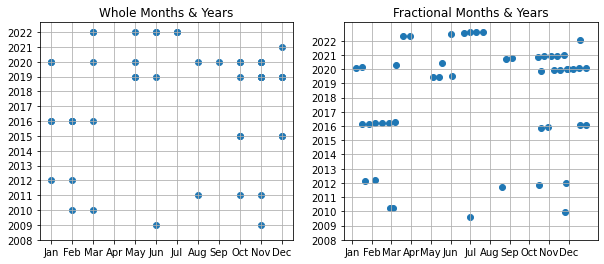

In [194]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(box_z.month,box_z.year)
plt.yticks(range(2008,2023),range(2008,2023))
plt.xticks(range(1,13),months)
plt.grid()
plt.title('Whole Months & Years')

plt.subplot(1,2,2)
plt.scatter(box_z.month_frac,box_z.year_frac)
plt.yticks(range(2008,2023),range(2008,2023))
plt.xticks(range(1,13),months)
plt.grid()
plt.title('Fractional Months & Years')

In [196]:
x_m = MKE0_dm.month_frac
x_y  = MKE0_dy.year_frac

Text(0.5, 1.0, 'MKE - EKE, Annual Density Variance')

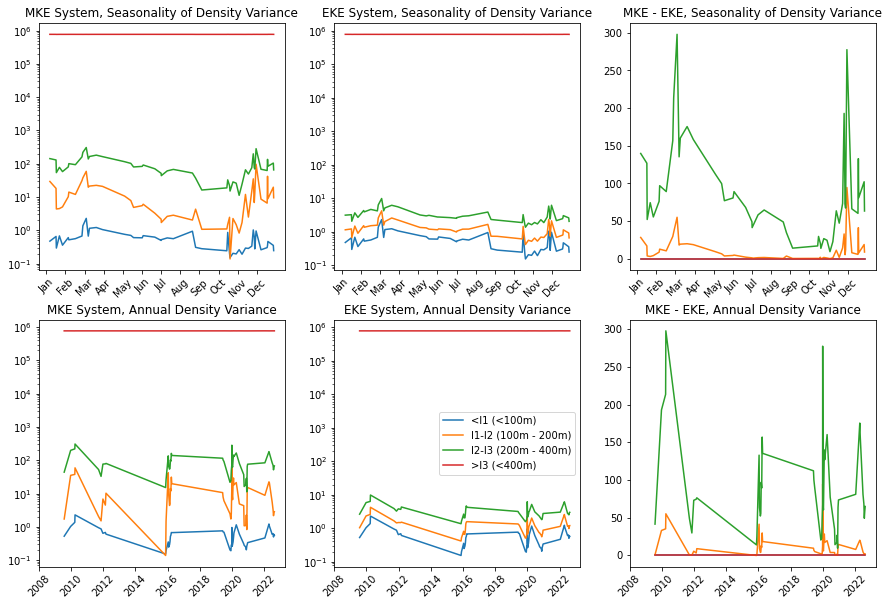

In [197]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.plot(x_m, MKE0_dm, label='<l1 (<{}m)'.format(l1))
plt.plot(x_m, MKE1_dm, label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_m, MKE2_dm, label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_m, MKE3_dm, label='>l3 (<{}m)'.format(l3))
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
#plt.legend()
plt.title('MKE System, Seasonality of Density Variance')

plt.subplot(2,3,2)
plt.plot(x_m, EKE0_dm, label='<l1 (<{}m)'.format(l1))
plt.plot(x_m, EKE1_dm, label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_m, EKE2_dm, label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_m, EKE3_dm, label='>l3 (>{}m)'.format(l3))
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
#plt.legend()
plt.title('EKE System, Seasonality of Density Variance')

plt.subplot(2,3,3)
plt.plot(x_m, (MKE0_dm-EKE0_dm), label='<l1 (<{}m)'.format(l1))
plt.plot(x_m, (MKE1_dm-EKE1_dm), label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_m, (MKE2_dm-EKE2_dm), label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_m, (MKE3_dm-EKE3_dm), label='>l3 (>{}m)'.format(l1))
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.title('MKE - EKE, Seasonality of Density Variance')

plt.subplot(2,3,4)
plt.plot(x_y, MKE0_dy, label='<l1 (<{}m)'.format(l1))
plt.plot(x_y, MKE1_dy, label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_y, MKE2_dy, label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_y, MKE3_dy, label='>l3 (<{}m)'.format(l3))
plt.xticks(ticks=range(2008,2024,2),labels=range(2008,2024,2),rotation=45)
plt.yscale('log')
#plt.legend()
plt.title('MKE System, Annual Density Variance')

plt.subplot(2,3,5)
plt.plot(x_y, EKE0_dy, label='<l1 (<{}m)'.format(l1))
plt.plot(x_y, EKE1_dy, label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_y, EKE2_dy, label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_y, EKE3_dy, label='>l3 (<{}m)'.format(l3))
plt.xticks(ticks=range(2008,2024,2),labels=range(2008,2024,2),rotation=45)
plt.yscale('log')
plt.legend()
plt.title('EKE System, Annual Density Variance')

plt.subplot(2,3,6)
plt.plot(x_y, (MKE0_dy-EKE0_dy), label='<l1 (<{}m)'.format(l1))
plt.plot(x_y, (MKE1_dy-EKE1_dy), label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_y, (MKE2_dy-EKE2_dy), label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_y, (MKE3_dy-EKE3_dy), label='>l3 (>{}m)'.format(l1))
plt.xticks(ticks=range(2008,2024,2),labels=range(2008,2024,2),rotation=45)
plt.title('MKE - EKE, Annual Density Variance')

Text(0.5, 1.0, 'MKE - EKE, Annual Spice Variance')

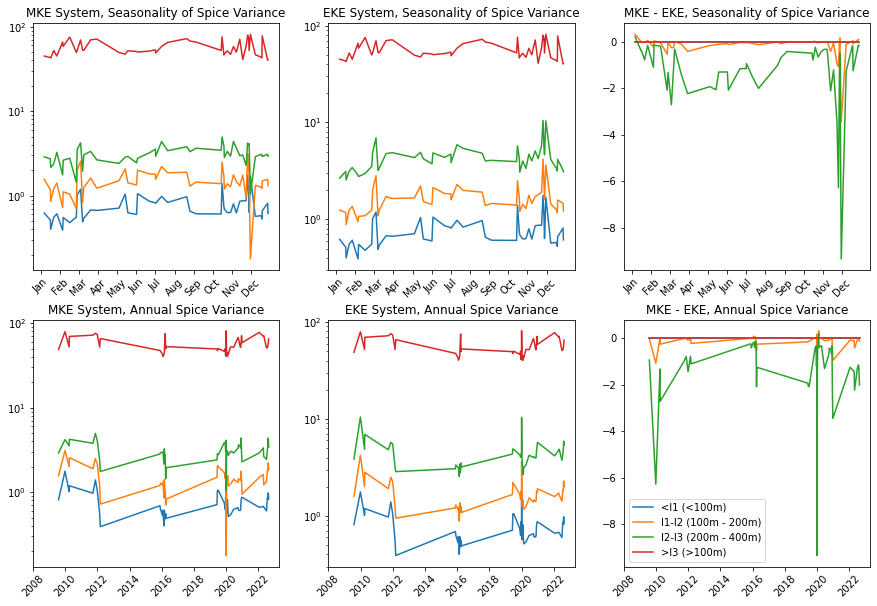

In [199]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.plot(x_m, MKE0_sm, label='<l1 (<{}m)'.format(l1))
plt.plot(x_m, MKE1_sm, label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_m, MKE2_sm, label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_m, MKE3_sm, label='>l3 (<{}m)'.format(l3))
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
#plt.legend()
plt.title('MKE System, Seasonality of Spice Variance')

plt.subplot(2,3,2)
plt.plot(x_m, EKE0_sm, label='<l1 (<{}m)'.format(l1))
plt.plot(x_m, EKE1_sm, label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_m, EKE2_sm, label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_m, EKE3_sm, label='>l3 (>{}m)'.format(l3))
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
#plt.legend()
plt.title('EKE System, Seasonality of Spice Variance')

plt.subplot(2,3,3)
plt.plot(x_m, (MKE0_sm-EKE0_sm), label='<l1 (<{}m)'.format(l1))
plt.plot(x_m, (MKE1_sm-EKE1_sm), label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_m, (MKE2_sm-EKE2_sm), label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_m, (MKE3_sm-EKE3_sm), label='>l3 (>{}m)'.format(l1))
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.title('MKE - EKE, Seasonality of Spice Variance')

plt.subplot(2,3,4)
plt.plot(x_y, MKE0_sy, label='<l1 (<{}m)'.format(l1))
plt.plot(x_y, MKE1_sy, label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_y, MKE2_sy, label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_y, MKE3_sy, label='>l3 (<{}m)'.format(l3))
plt.xticks(ticks=range(2008,2024,2),labels=range(2008,2024,2),rotation=45)
plt.yscale('log')
#plt.legend()
plt.title('MKE System, Annual Spice Variance')

plt.subplot(2,3,5)
plt.plot(x_y, EKE0_sy, label='<l1 (<{}m)'.format(l1))
plt.plot(x_y, EKE1_sy, label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_y, EKE2_sy, label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_y, EKE3_sy, label='>l3 (<{}m)'.format(l3))
plt.xticks(ticks=range(2008,2024,2),labels=range(2008,2024,2),rotation=45)
plt.yscale('log')
#plt.legend()
plt.title('EKE System, Annual Spice Variance')

plt.subplot(2,3,6)
plt.plot(x_y, (MKE0_sy-EKE0_sy), label='<l1 (<{}m)'.format(l1))
plt.plot(x_y, (MKE1_sy-EKE1_sy), label='l1-l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_y, (MKE2_sy-EKE2_sy), label='l2-l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_y, (MKE3_sy-EKE3_sy), label='>l3 (>{}m)'.format(l1))
plt.xticks(ticks=range(2008,2024,2),labels=range(2008,2024,2),rotation=45)
plt.legend()
plt.title('MKE - EKE, Annual Spice Variance')

In [200]:
box_z.MLD.max().values + l3

588

In [201]:
d1 = 150
d2 = 500
d3 = 1000

In [202]:
EKE0_dm0 = EKE0_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d1).sum('PRES_INTERPOLATED')
EKE1_dm0 = EKE1_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d1).sum('PRES_INTERPOLATED')
EKE2_dm0 = EKE2_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d1).sum('PRES_INTERPOLATED')
EKE3_dm0 = EKE3_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d1).sum('PRES_INTERPOLATED')

EKE0_dm1 = EKE0_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d2).where(box_z.PRES_INTERPOLATED>d1).sum('PRES_INTERPOLATED')
EKE1_dm1 = EKE1_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d2).where(box_z.PRES_INTERPOLATED>d1).sum('PRES_INTERPOLATED')
EKE2_dm1 = EKE2_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d2).where(box_z.PRES_INTERPOLATED>d1).sum('PRES_INTERPOLATED')
EKE3_dm1 = EKE3_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d2).where(box_z.PRES_INTERPOLATED>d1).sum('PRES_INTERPOLATED')

EKE0_dm2 = EKE0_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d3).where(box_z.PRES_INTERPOLATED>d2).sum('PRES_INTERPOLATED')
EKE1_dm2 = EKE1_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d3).where(box_z.PRES_INTERPOLATED>d2).sum('PRES_INTERPOLATED')
EKE2_dm2 = EKE2_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d3).where(box_z.PRES_INTERPOLATED>d2).sum('PRES_INTERPOLATED')
EKE3_dm2 = EKE3_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d3).where(box_z.PRES_INTERPOLATED>d2).sum('PRES_INTERPOLATED')

EKE0_dm3 = EKE0_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED>d3).sum('PRES_INTERPOLATED')
EKE1_dm3 = EKE1_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED>d3).sum('PRES_INTERPOLATED')
EKE2_dm3 = EKE2_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED>d3).sum('PRES_INTERPOLATED')
EKE3_dm3 = EKE3_d.sortby('month_frac').where(box_z.PRES_INTERPOLATED>d3).sum('PRES_INTERPOLATED')

In [203]:
EKE0_sm0 = EKE0_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d1).sum('PRES_INTERPOLATED')
EKE1_sm0 = EKE1_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d1).sum('PRES_INTERPOLATED')
EKE2_sm0 = EKE2_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d1).sum('PRES_INTERPOLATED')
EKE3_sm0 = EKE3_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d1).sum('PRES_INTERPOLATED')

EKE0_sm1 = EKE0_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d2).where(box_z.PRES_INTERPOLATED>d1).sum('PRES_INTERPOLATED')
EKE1_sm1 = EKE1_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d2).where(box_z.PRES_INTERPOLATED>d1).sum('PRES_INTERPOLATED')
EKE2_sm1 = EKE2_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d2).where(box_z.PRES_INTERPOLATED>d1).sum('PRES_INTERPOLATED')
EKE3_sm1 = EKE3_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d2).where(box_z.PRES_INTERPOLATED>d1).sum('PRES_INTERPOLATED')

EKE0_sm2 = EKE0_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d3).where(box_z.PRES_INTERPOLATED>d2).sum('PRES_INTERPOLATED')
EKE1_sm2 = EKE1_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d3).where(box_z.PRES_INTERPOLATED>d2).sum('PRES_INTERPOLATED')
EKE2_sm2 = EKE2_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d3).where(box_z.PRES_INTERPOLATED>d2).sum('PRES_INTERPOLATED')
EKE3_sm2 = EKE3_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED<d3).where(box_z.PRES_INTERPOLATED>d2).sum('PRES_INTERPOLATED')

EKE0_sm3 = EKE0_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED>d3).sum('PRES_INTERPOLATED')
EKE1_sm3 = EKE1_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED>d3).sum('PRES_INTERPOLATED')
EKE2_sm3 = EKE2_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED>d3).sum('PRES_INTERPOLATED')
EKE3_sm3 = EKE3_s.sortby('month_frac').where(box_z.PRES_INTERPOLATED>d3).sum('PRES_INTERPOLATED')

Text(0.5, 1.0, '(6) >1000m depth')

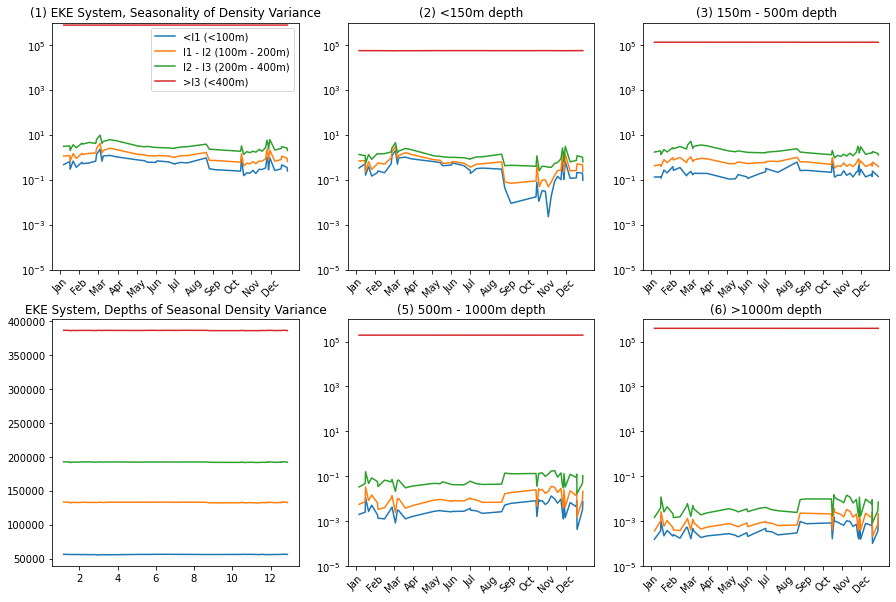

In [204]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.plot(x_m, EKE0_dm,label='<l1 (<{}m)'.format(l1))
plt.plot(x_m, EKE1_dm,label='l1 - l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_m, EKE2_dm,label='l2 - l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_m, EKE3_dm,label='>l3 (<{}m)'.format(l3))
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.legend()
plt.yscale('log')
plt.ylim((10**-5,10**6))
plt.title('(1) EKE System, Seasonality of Density Variance')

plt.subplot(2,3,2)
plt.plot(x_m, EKE0_dm0)
plt.plot(x_m, EKE1_dm0)
plt.plot(x_m, EKE2_dm0)
plt.plot(x_m, EKE3_dm0)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-5,10**6))
plt.title('(2) <{}m depth'.format(d1))

plt.subplot(2,3,3)
plt.plot(x_m, EKE0_dm1)
plt.plot(x_m, EKE1_dm1)
plt.plot(x_m, EKE2_dm1)
plt.plot(x_m, EKE3_dm1)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-5,10**6))
plt.title('(3) {}m - {}m depth'.format(d1,d2))

plt.subplot(2,3,4)
plt.plot(x_m, (EKE0_dm0+EKE1_dm0+EKE2_dm0+EKE3_dm0),label='<{}m depth'.format(d1))
plt.plot(x_m, (EKE0_dm1+EKE1_dm1+EKE2_dm1+EKE3_dm1),label='{}m - {}m depth'.format(d1,d2))
plt.plot(x_m, (EKE0_dm2+EKE1_dm2+EKE2_dm2+EKE3_dm2),label='{}m - {}m depth'.format(d2,d3))
plt.plot(x_m, (EKE0_dm3+EKE1_dm3+EKE2_dm3+EKE3_dm3),label='>{}m depth'.format(d3))
plt.title('EKE System, Depths of Seasonal Density Variance')

plt.subplot(2,3,5)
plt.plot(x_m, EKE0_dm2)
plt.plot(x_m, EKE1_dm2)
plt.plot(x_m, EKE2_dm2)
plt.plot(x_m, EKE3_dm2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-5,10**6))
plt.title('(5) {}m - {}m depth'.format(d2,d3))

plt.subplot(2,3,6)
plt.plot(x_m, EKE0_dm3)
plt.plot(x_m, EKE1_dm3)
plt.plot(x_m, EKE2_dm3)
plt.plot(x_m, EKE3_dm3)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-5,10**6))
plt.title('(6) >{}m depth'.format(d3))

Text(0.5, 1.0, '(6) >1000m depth')

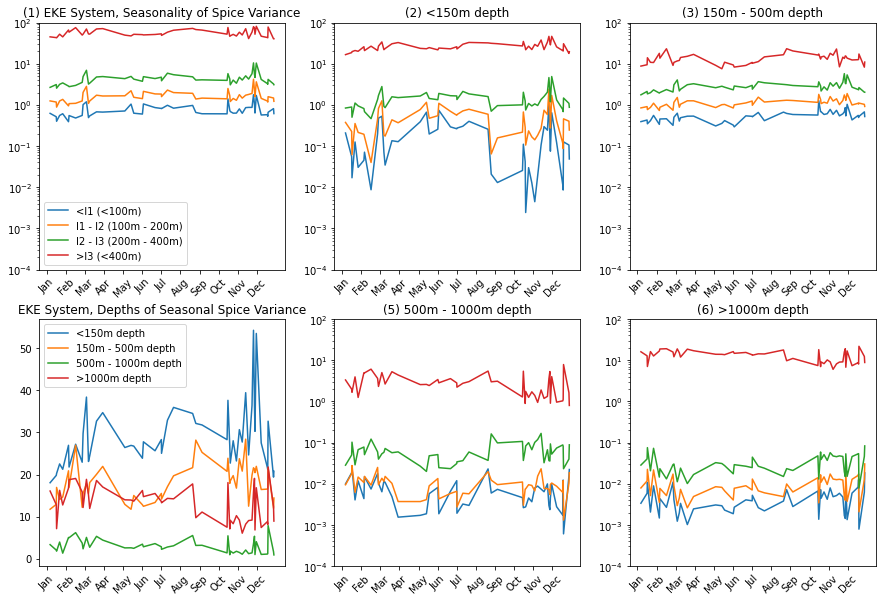

In [208]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.plot(x_m, EKE0_sm,label='<l1 (<{}m)'.format(l1))
plt.plot(x_m, EKE1_sm,label='l1 - l2 ({}m - {}m)'.format(l1,l2))
plt.plot(x_m, EKE2_sm,label='l2 - l3 ({}m - {}m)'.format(l2,l3))
plt.plot(x_m, EKE3_sm,label='>l3 (<{}m)'.format(l3))
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-4,10**2))
plt.legend()
plt.title('(1) EKE System, Seasonality of Spice Variance')
        
plt.subplot(2,3,2)
plt.plot(x_m, EKE0_sm0)
plt.plot(x_m, EKE1_sm0)
plt.plot(x_m, EKE2_sm0)
plt.plot(x_m, EKE3_sm0)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-4,10**2))
plt.title('(2) <{}m depth'.format(d1))

plt.subplot(2,3,3)
plt.plot(x_m, EKE0_sm1)
plt.plot(x_m, EKE1_sm1)
plt.plot(x_m, EKE2_sm1)
plt.plot(x_m, EKE3_sm1)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-4,10**2))
plt.title('(3) {}m - {}m depth'.format(d1,d2))

plt.subplot(2,3,4)
plt.plot(x_m, (EKE0_sm0+EKE1_sm0+EKE2_sm0+EKE3_sm0),label='<{}m depth'.format(d1))
plt.plot(x_m, (EKE0_sm1+EKE1_sm1+EKE2_sm1+EKE3_sm1),label='{}m - {}m depth'.format(d1,d2))
plt.plot(x_m, (EKE0_sm2+EKE1_sm2+EKE2_sm2+EKE3_sm2),label='{}m - {}m depth'.format(d2,d3))
plt.plot(x_m, (EKE0_sm3+EKE1_sm3+EKE2_sm3+EKE3_sm3),label='>{}m depth'.format(d3))
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.legend()
plt.title('EKE System, Depths of Seasonal Spice Variance')

plt.subplot(2,3,5)
plt.plot(x_m, EKE0_sm2)
plt.plot(x_m, EKE1_sm2)
plt.plot(x_m, EKE2_sm2)
plt.plot(x_m, EKE3_sm2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-4,10**2))
plt.title('(5) {}m - {}m depth'.format(d2,d3))

plt.subplot(2,3,6)
plt.plot(x_m, EKE0_sm3)
plt.plot(x_m, EKE1_sm3)
plt.plot(x_m, EKE2_sm3)
plt.plot(x_m, EKE3_sm3)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-4,10**2))
plt.title('(6) >{}m depth'.format(d3))